In [ ]:
import os
import PIL
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import cv2
from google.colab.patches import cv2_imshow
%matplotlib inline

In [ ]:
if not os.path.exists('/content/drive/MyDrive/Puneeth/Major/dataset'):
  os.mkdir('/content/drive/MyDrive/Puneeth/Major/dataset')

In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/Puneeth/Major/1512427.zip') as zf:
  zip_dir = zf.namelist()[0]
  zf.extractall('/content/drive/MyDrive/Puneeth/Major/dataset')

In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/Puneeth/Major/dataset/brainTumorDataPublic_1-766.zip') as zf:
  os.mkdir('/content/drive/MyDrive/Puneeth/Major/dataset/bt_set1')
  zip_dir = zf.namelist()[0]
  zf.extractall('/content/drive/MyDrive/Puneeth/Major/dataset/bt_set1')

In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/Puneeth/Major/dataset/brainTumorDataPublic_767-1532.zip') as zf:
  os.mkdir('/content/drive/MyDrive/Puneeth/Major/dataset/bt_set2')
  zip_dir = zf.namelist()[0]
  zf.extractall('/content/drive/MyDrive/Puneeth/Major/dataset/bt_set2')

In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/Puneeth/Major/dataset/brainTumorDataPublic_1533-2298.zip') as zf:
  os.mkdir('/content/drive/MyDrive/Puneeth/Major/dataset/bt_set3')
  zip_dir = zf.namelist()[0]
  zf.extractall('/content/drive/MyDrive/Puneeth/Major/dataset/bt_set3')

In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/Puneeth/Major/dataset/brainTumorDataPublic_2299-3064.zip') as zf:
  os.mkdir('/content/drive/MyDrive/Puneeth/Major/dataset/bt_set4')
  zip_dir = zf.namelist()[0]
  zf.extractall('/content/drive/MyDrive/Puneeth/Major/dataset/bt_set4')

In [ ]:
os.mkdir('/content/drive/MyDrive/Puneeth/Major/dataset/imageData')

In [ ]:
!mv /content/drive/'MyDrive'/'Puneeth'/'Major'/dataset/bt_set1/*.mat '/content/drive/MyDrive/Puneeth/Major/dataset/imageData/'
!mv /content/drive/'MyDrive'/'Puneeth'/'Major'/dataset/bt_set2/*.mat '/content/drive/MyDrive/Puneeth/Major/dataset/imageData/'
!mv /content/drive/'MyDrive'/'Puneeth'/'Major'/dataset/bt_set3/*.mat '/content/drive/MyDrive/Puneeth/Major/dataset/imageData/'
!mv /content/drive/'MyDrive'/'Puneeth'/'Major'/dataset/bt_set4/*.mat '/content/drive/MyDrive/Puneeth/Major/dataset/imageData/'

In [ ]:
c=0
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Puneeth/Major/dataset/imageData'):
    for filename in filenames:
      c+=1
print(c)

In [ ]:
with h5py.File('/content/drive/MyDrive/Puneeth/Major/dataset/imageData/1.mat', 'r') as f:
    img = f['cjdata']['image']
    label = f['cjdata']['label'][0][0]
    tumorBorder = f['cjdata']['tumorBorder'][0]
    mask = f['cjdata']['tumorMask']
    fig = plt.figure(2)
    img = np.array(img, dtype=np.float32)
    mask = np.array(mask, dtype=np.float32)
    plt.axis('off')
    plt.imshow(img, cmap='gray')
    print("Image shape: ", img.shape)
    print("Label", label)
    print("Coords: ", tumorBorder)
    print("Mask shape: ", mask.shape)
    fig = plt.figure(3)
    plt.axis('off')
    plt.imshow(mask, cmap='gray')

In [ ]:
filename = None

for filename in range(1, 3065):
  with h5py.File('/content/drive/MyDrive/Puneeth/Major/dataset/imageData/{}.mat'.format(filename), 'r') as f:
      img = f['cjdata']['image']
      label = f['cjdata']['label'][0][0]
      img = np.array(img, dtype=np.float32)
      fig = plt.figure(figsize=(5,5))
      plt.imshow(img, cmap='gray')
      mask = f['cjdata']['tumorMask']
      mask = np.array(mask, dtype=np.float32)
      mask = np.ma.masked_where(mask == False, mask)
      plt.imshow(mask, alpha=0.3, cmap='Set1')
      plt.axis('off')
      plt.gca().set_axis_off()
      plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
      plt.margins(0,0)
      if(int(label)==1):
        plt.savefig('/content/drive/MyDrive/Puneeth/Major/new_dataset/new/m/{0}'.format(filename))
        plt.close(fig)
      elif(int(label)==2):
        plt.savefig('/content/drive/MyDrive/Puneeth/Major/new_dataset/new/glioma/{0}'.format(filename))
        plt.close(fig)
      elif(int(label)==3):
        plt.savefig('/content/drive/MyDrive/Puneeth/Major/new_dataset/new/p/{0}'.format(filename))
        plt.close(fig)
      
      

In [ ]:
import os
c=[]
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Puneeth/Major/new_dataset/new/glioma'):
    for filename in filenames:
      c.append(int(filename[:-4]))
print(c)
len(c)

[2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150, 2151, 2152, 2153, 2154, 2155, 2156, 2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2171, 2172, 2173, 2174, 2175, 2176, 2177, 2178, 2179, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2212, 2213, 2214, 2215, 2216, 2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227, 222

1426

In [ ]:
import os
c=[]
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Puneeth/Major/new_dataset/new/m'):
    for filename in filenames:
      c.append(int(filename[:-4]))
print(c)
len(c)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 2

708

In [ ]:
import os
c=[]
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Puneeth/Major/new_dataset/new/p'):
    for filename in filenames:
      c.append(int(filename[:-4]))
print(c)
len(c)

[59, 709, 710, 711, 712, 713, 714, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 109

930

In [ ]:
import random
test_len=len(c)*3
test_len=test_len//10
p_test=random.sample(c, test_len)

In [ ]:
p_test

In [ ]:
len(c)

930

In [ ]:
import shutil
for j in p_test:
    dst2="/content/drive/MyDrive/Puneeth/Major/new_dataset/new/p_test"
    src2="/content/drive/MyDrive/Puneeth/Major/new_dataset/new/p"
    fnam2=os.path.join(src2, "%d.png"%j)
    shutil.move(fnam2, dst2)

In [ ]:
import os
c=[]
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Puneeth/Major/new_dataset/new/p'):
    for filename in filenames:
      c.append(int(filename[:-4]))
print(c)
len(c)

[59, 709, 710, 711, 712, 713, 918, 919, 920, 923, 924, 925, 926, 928, 929, 931, 932, 936, 940, 941, 942, 943, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 959, 960, 961, 962, 964, 965, 966, 967, 968, 969, 971, 972, 973, 974, 975, 976, 977, 979, 980, 982, 983, 984, 985, 987, 988, 990, 994, 996, 997, 998, 999, 1001, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1015, 1017, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1030, 1032, 1033, 1034, 1035, 1037, 1039, 1040, 1041, 1042, 1043, 1045, 1047, 1048, 1049, 1050, 1052, 1053, 1055, 1056, 1057, 1058, 1061, 1063, 1065, 1066, 1069, 1070, 1071, 1073, 1076, 1077, 1079, 1080, 1081, 1082, 1083, 1084, 1087, 1088, 1089, 1090, 1091, 1094, 1095, 1096, 1102, 1104, 1105, 1106, 1108, 1109, 1111, 1112, 1113, 1115, 1116, 1117, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1129, 1130, 1133, 1134, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1144, 1145, 1146, 1148, 1149, 1150, 1151, 1152, 1153, 1155, 1157, 1158, 1159, 1160, 116

651

In [ ]:
import os
c=[]
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Puneeth/Major/new_dataset/new/m'):
    for filename in filenames:
      c.append(int(filename[:-4]))
print(c)
len(c)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 2

708

In [ ]:
import random
test_len=len(c)*3
test_len=test_len//10
m_test=random.sample(c, test_len)
len(m_test)

212

In [ ]:
import shutil
for j in m_test:
    dst2="/content/drive/MyDrive/Puneeth/Major/new_dataset/new/m_test"
    src2="/content/drive/MyDrive/Puneeth/Major/new_dataset/new/m"
    fnam2=os.path.join(src2, "%d.png"%j)
    shutil.move(fnam2, dst2)

In [ ]:
import os
c=[]
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Puneeth/Major/new_dataset/new/m'):
    for filename in filenames:
      c.append(int(filename[:-4]))
print(c)
len(c)

[3, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 18, 19, 20, 21, 23, 24, 27, 29, 30, 31, 32, 36, 37, 38, 40, 43, 44, 46, 47, 51, 53, 56, 57, 62, 63, 64, 65, 66, 70, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 105, 107, 110, 112, 113, 114, 115, 116, 117, 119, 121, 122, 123, 124, 126, 127, 129, 131, 133, 134, 136, 137, 139, 140, 141, 143, 144, 145, 148, 150, 151, 153, 154, 155, 158, 159, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 172, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 186, 191, 192, 193, 194, 196, 197, 198, 200, 201, 202, 203, 205, 206, 207, 208, 211, 212, 213, 214, 215, 216, 219, 220, 224, 225, 226, 227, 229, 231, 232, 233, 234, 235, 236, 237, 239, 240, 241, 242, 244, 246, 248, 249, 251, 252, 253, 255, 256, 257, 259, 260, 262, 263, 264, 266, 267, 268, 269, 270, 271, 273, 274, 275, 276, 277, 279, 281, 282, 284, 285, 286, 288, 290, 291, 294, 295, 296, 297, 298, 299, 300, 301, 303, 305, 306, 307, 308, 311, 312

496

In [ ]:
import os
c=[]
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Puneeth/Major/new_dataset/new/glioma'):
    for filename in filenames:
      c.append(int(filename[:-4]))
print(c)
len(c)

[2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150, 2151, 2152, 2153, 2154, 2155, 2156, 2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2171, 2172, 2173, 2174, 2175, 2176, 2177, 2178, 2179, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2212, 2213, 2214, 2215, 2216, 2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227, 222

1426

In [ ]:
import random
test_len=len(c)*3
test_len=test_len//10
g_test=random.sample(c, test_len)

In [ ]:
import shutil
for j in g_test:
    dst2="/content/drive/MyDrive/Puneeth/Major/new_dataset/new/g_test"
    src2="/content/drive/MyDrive/Puneeth/Major/new_dataset/new/glioma"
    fnam2=os.path.join(src2, "%d.png"%j)
    shutil.move(fnam2, dst2)

In [ ]:
import os
c=[]
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Puneeth/Major/new_dataset/new/glioma'):
    for filename in filenames:
      c.append(int(filename[:-4]))
print(c)
len(c)

[2062, 2063, 2064, 2065, 2067, 2068, 2069, 2071, 2073, 2074, 2075, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2093, 2094, 2096, 2097, 2099, 2100, 2101, 2102, 2104, 2105, 2106, 2108, 2110, 2111, 2113, 2114, 2116, 2117, 2118, 2119, 2123, 2124, 2125, 2126, 2128, 2129, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2140, 2142, 2144, 2145, 2146, 2148, 2150, 2151, 2152, 2153, 2155, 2156, 2157, 2158, 2160, 2161, 2162, 2163, 2165, 2167, 2168, 2169, 2172, 2173, 2175, 2176, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2189, 2191, 2193, 2194, 2195, 2196, 2198, 2199, 2200, 2202, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2212, 2213, 2215, 2216, 2217, 2219, 2220, 2222, 2223, 2224, 2225, 2226, 2227, 2228, 2230, 2231, 2232, 2233, 2234, 2235, 2236, 2238, 2239, 2240, 2241, 2243, 2246, 2247, 2248, 2249, 2250, 2252, 2253, 2254, 2255, 2256, 2257, 2258, 2261, 2264, 2265, 2267, 2269, 2270, 2272, 2273, 2274, 2277, 2278, 2279, 2280, 2281, 2282, 2283, 2284, 2286, 2287, 2288, 229

999

In [ ]:
import os
c=[]
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Puneeth/Major/new_dataset/new1/Test/p'):
    for filename in filenames:
      c.append(int(filename[:-4]))
print(c)
len(c)

[714, 921, 929, 939, 940, 945, 947, 948, 951, 967, 975, 986, 994, 1000, 1008, 1010, 1013, 1016, 1019, 1030, 1039, 1041, 1055, 1086, 1087, 1118, 1129, 1130, 1139, 1162, 1167, 1168, 1172, 1195, 1198, 1205, 1206, 1210, 1213, 1218, 1224, 1227, 1243, 1245, 1247, 1250, 1251, 1262, 1267, 1270, 1272, 1274, 1281, 1283, 1285, 1292, 1313, 1314, 1318, 1320, 1329, 1332, 1333, 1336, 1341, 1345, 1353, 1356, 1384, 1396, 1397, 1405, 1406, 1415, 1421, 1426, 1431, 1433, 1434, 1438, 1453, 1457, 1462, 1463, 1467, 1468, 1474, 1480, 1491, 1495, 1504, 1521, 1531, 1534, 1536, 1541, 1543, 1552, 1567, 1569, 1574, 1587, 1599, 1603, 1608, 1609, 1627, 1629, 1632, 1633, 1637, 1640, 1651, 1662, 1672, 1675, 1685, 1693, 1696, 1706, 1708, 1714, 1725, 1735, 1741, 1747, 1750, 1751, 1757, 1759, 1763, 1767, 1774, 1780, 1793, 1795, 1798, 1806, 1816, 1817]


140

In [ ]:
import random
test_len=len(c)*5
test_len=test_len//10
m_test=random.sample(c, test_len)

In [ ]:
import shutil
for j in m_test:
    dst2="/content/drive/MyDrive/Puneeth/Major/new_dataset/new1/Train/p"
    src2="/content/drive/MyDrive/Puneeth/Major/new_dataset/new1/Test/p"
    fnam2=os.path.join(src2, "%d.png"%j)
    shutil.move(fnam2, dst2)

In [ ]:
import os
c=[]
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Puneeth/patientID/TCGA_CS_4941_19960909'):
    for filename in filenames:
      if(filename.find('mask')==-1):
        c.append(filename)
print(c)
len(c)

['TCGA_CS_4941_19960909_11.tif', 'TCGA_CS_4941_19960909_1.tif', 'TCGA_CS_4941_19960909_12.tif', 'TCGA_CS_4941_19960909_10.tif', 'TCGA_CS_4941_19960909_13.tif', 'TCGA_CS_4941_19960909_15.tif', 'TCGA_CS_4941_19960909_14.tif', 'TCGA_CS_4941_19960909_19.tif', 'TCGA_CS_4941_19960909_17.tif', 'TCGA_CS_4941_19960909_18.tif', 'TCGA_CS_4941_19960909_16.tif', 'TCGA_CS_4941_19960909_21.tif', 'TCGA_CS_4941_19960909_20.tif', 'TCGA_CS_4941_19960909_2.tif', 'TCGA_CS_4941_19960909_22.tif', 'TCGA_CS_4941_19960909_23.tif', 'TCGA_CS_4941_19960909_3.tif', 'TCGA_CS_4941_19960909_6.tif', 'TCGA_CS_4941_19960909_4.tif', 'TCGA_CS_4941_19960909_5.tif', 'TCGA_CS_4941_19960909_9.tif', 'TCGA_CS_4941_19960909_8.tif', 'TCGA_CS_4941_19960909_7.tif']


23

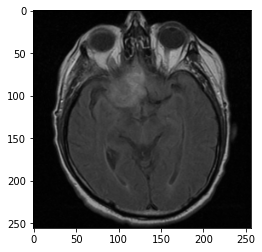

In [ ]:
from PIL import Image
img = Image.open('/content/drive/MyDrive/Puneeth/patientID/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_11.tif').convert('LA')
plt.imshow(img, cmap='gray')

In [ ]:
import glob
data_map = []
for sub_dir_path in glob.glob("/content/drive/MyDrive/Puneeth/patientID/"+"*"):
    #if os.path.isdir(sub_path_dir):
    try:
        dir_name = sub_dir_path.split('/')[-1]
        for filename in os.listdir(sub_dir_path):
            image_path = sub_dir_path + '/' + filename
            data_map.extend([dir_name, image_path])
    except Exception as e:
        print(e)

[Errno 20] Not a directory: '/content/drive/MyDrive/Puneeth/patientID/README.md'
[Errno 20] Not a directory: '/content/drive/MyDrive/Puneeth/patientID/data.csv'


In [ ]:
import pandas as pd

df = pd.DataFrame({"patient_id" : data_map[::2],
                   "path" : data_map[1::2]})
df.head()

,patient_id,path
0,TCGA_HT_A61B_19991127,/content/drive/MyDrive/Puneeth/patientID/TCGA_...
1,TCGA_HT_A61B_19991127,/content/drive/MyDrive/Puneeth/patientID/TCGA_...
2,TCGA_HT_A61B_19991127,/content/drive/MyDrive/Puneeth/patientID/TCGA_...
3,TCGA_HT_A61B_19991127,/content/drive/MyDrive/Puneeth/patientID/TCGA_...
4,TCGA_HT_A61B_19991127,/content/drive/MyDrive/Puneeth/patientID/TCGA_...


In [ ]:
import random
df_imgs = df[~df['path'].str.contains("mask")]
df_masks = df[df['path'].str.contains("mask")]

# File path line length images for later sorting
BASE_LEN = 85  #len("/content/drive/MyDrive/Puneeth/patientID/TCGA_DU_6404_19850629/TCGA_DU_6404_19850629_ <-!!!43.tif")
END_IMG_LEN =4   #len("/content/drive/MyDrive/Puneeth/patientID/TCGA_DU_6404_19850629/TCGA_DU_6404_19850629_43 !!!->.tif")
END_MASK_LEN = 9 #len("/content/drive/MyDrive/Puneeth/patientID/TCGA_DU_6404_19850629/TCGA_DU_6404_19850629_43 !!!->_mask.tif")

# Data sorting
imgs = sorted(df_imgs["path"].values, key=lambda x : x[BASE_LEN:-END_IMG_LEN])
masks = sorted(df_masks["path"].values, key=lambda x : x[BASE_LEN:-END_MASK_LEN])

# Sorting check
idx = random.randint(0, len(imgs)-1)
print("Path to the Image:", imgs[idx], "\nPath to the Mask:", masks[idx])

Path to the Image: /content/drive/MyDrive/Puneeth/patientID/TCGA_DU_A5TT_19980318/TCGA_DU_A5TT_19980318_25.tif 
Path to the Mask: /content/drive/MyDrive/Puneeth/patientID/TCGA_DU_A5TT_19980318/TCGA_DU_A5TT_19980318_25_mask.tif


In [ ]:
# Final dataframe
import numpy as np

brain_df = pd.DataFrame({"patient_id": df_imgs.patient_id.values,
                         "image_path": imgs,
                         "mask_path": masks
                        })
def pos_neg_diagnosis(mask_path):
    value = np.max(cv2.imread(mask_path))
    if value > 0 : 
        return 1
    else:
        return 0
    
brain_df['mask'] = brain_df['mask_path'].apply(lambda x: pos_neg_diagnosis(x))
brain_df

,patient_id,image_path,mask_path,mask
0,TCGA_HT_A61B_19991127,/content/drive/MyDrive/Puneeth/patientID/TCGA_...,/content/drive/MyDrive/Puneeth/patientID/TCGA_...,0
1,TCGA_HT_A61B_19991127,/content/drive/MyDrive/Puneeth/patientID/TCGA_...,/content/drive/MyDrive/Puneeth/patientID/TCGA_...,0
2,TCGA_HT_A61B_19991127,/content/drive/MyDrive/Puneeth/patientID/TCGA_...,/content/drive/MyDrive/Puneeth/patientID/TCGA_...,0
3,TCGA_HT_A61B_19991127,/content/drive/MyDrive/Puneeth/patientID/TCGA_...,/content/drive/MyDrive/Puneeth/patientID/TCGA_...,0
4,TCGA_HT_A61B_19991127,/content/drive/MyDrive/Puneeth/patientID/TCGA_...,/content/drive/MyDrive/Puneeth/patientID/TCGA_...,0
...,...,...,...,...
3924,TCGA_CS_4943_20000902,/content/drive/MyDrive/Puneeth/patientID/TCGA_...,/content/drive/MyDrive/Puneeth/patientID/TCGA_...,0
3925,TCGA_CS_4943_20000902,/content/drive/MyDrive/Puneeth/patientID/TCGA_...,/content/drive/MyDrive/Puneeth/patientID/TCGA_...,1
3926,TCGA_CS_4943_20000902,/content/drive/MyDrive/Puneeth/patientID/TCGA_...,/content/drive/MyDrive/Puneeth/patientID/TCGA_...,1
3927,TCGA_CS_4943_20000902,/content/drive/MyDrive/Puneeth/patientID/TCGA_...,/content/drive/MyDrive/Puneeth/patientID/TCGA_...,0


In [ ]:
c=pos_neg_diagnosis('/content/drive/MyDrive/Puneeth/patientID/TCGA_HT_7855_19951020/TCGA_HT_7855_19951020_1_mask.tif')
c

0

In [ ]:
d=brain_df[brain_df['mask']==0]
d.drop(columns=['patient_id','mask_path','mask'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
d

,image_path
0,/content/drive/MyDrive/Puneeth/patientID/TCGA_...
1,/content/drive/MyDrive/Puneeth/patientID/TCGA_...
2,/content/drive/MyDrive/Puneeth/patientID/TCGA_...
3,/content/drive/MyDrive/Puneeth/patientID/TCGA_...
4,/content/drive/MyDrive/Puneeth/patientID/TCGA_...
...,...
3919,/content/drive/MyDrive/Puneeth/patientID/TCGA_...
3923,/content/drive/MyDrive/Puneeth/patientID/TCGA_...
3924,/content/drive/MyDrive/Puneeth/patientID/TCGA_...
3927,/content/drive/MyDrive/Puneeth/patientID/TCGA_...


In [ ]:
len(list)

2556

In [ ]:
list=d.values.tolist()


In [ ]:
l=[]
for i in list:
  l.append(i[0])
l

In [ ]:
from PIL import Image
k=3065
for i in l:
  img = Image.open(i).convert('LA')
  fig = plt.figure(figsize=(5,5))
  plt.axis('off')
  plt.gca().set_axis_off()
  plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
  plt.margins(0,0)
  plt.imshow(img, cmap='gray')
  plt.savefig('/content/drive/MyDrive/Puneeth/Major/new_dataset/new/notumor/{0}'.format(k))
  k+=1
  plt.close(fig)

In [ ]:
import cv2

im = cv2.imread('/content/drive/MyDrive/Puneeth/Major/new_dataset/new/notumor/0.png')
print(im.shape)

(360, 360, 3)


In [ ]:
import os
c=0
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Puneeth/Major/new_dataset/new/notumor'):
    for filename in filenames:
      c+=1
print(c)

2556


In [ ]:
import os
c=[]
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Puneeth/Major/new_dataset/new/notumor1'):
    for filename in filenames:
      c.append(int(filename[:-4]))
print(c)
len(c)

[3746, 3715, 3319, 3464, 3851, 4833, 5358, 4301, 4949, 3195, 3804, 5599, 3759, 3438, 5357, 3392, 3526, 3427, 5180, 3701, 4097, 4104, 5270, 3067, 4113, 4549, 5003, 4002, 4568, 4583, 3791, 3323, 4811, 4512, 3546, 5195, 4947, 3570, 4534, 5364, 3270, 5613, 4832, 4062, 5265, 5314, 3159, 3662, 3329, 5043, 3303, 5148, 4849, 5106, 4790, 3655, 4801, 5181, 3659, 5449, 3446, 5077, 3321, 4021, 3492, 5538, 4040, 4326, 4145, 5453, 5231, 4851, 5408, 5339, 3477, 5596, 4218, 3848, 3838, 5508, 3386, 3940, 4701, 5535, 3743, 4742, 4831, 4686, 5142, 5544, 3352, 4797, 5211, 4626, 4722, 4693, 4433, 5028, 3630, 3914, 3613, 3463, 3269, 4019, 3469, 5578, 3714, 4129, 3859, 5155, 4821, 4235, 5590, 3900, 3809, 4754, 5433, 3903, 4707, 5078, 4214, 3229, 4819, 5325, 5428, 5322, 3136, 3205, 3190, 3778, 4932, 4123, 3153, 4715, 5183, 3915, 3685, 5615, 3192, 3669, 5427, 4953, 3089, 5159, 4189, 3095, 3779, 5063, 4175, 3611, 3407, 4996, 3181, 4100, 4101, 5586, 4751, 3199, 3160, 5480, 3494, 3738, 3658, 5351, 4930, 5444, 325

770

In [ ]:
import random
test_len=len(c)*40
test_len=test_len//100
g_test=random.sample(c, test_len)

In [ ]:
import shutil
for j in g_test:
    dst2="/content/drive/MyDrive/Puneeth/Major/new_dataset/new/notumor1"
    src2="/content/drive/MyDrive/Puneeth/Major/new_dataset/new/notumor"
    fnam2=os.path.join(src2, "%d.png"%j)
    shutil.copy(fnam2, dst2)

In [ ]:
import random
test_len=len(c)*3
test_len=test_len//10
g_test=random.sample(c, test_len)

In [ ]:
import shutil
for j in g_test:
    dst2="/content/drive/MyDrive/Puneeth/Major/new_dataset/new/notumortest"
    src2="/content/drive/MyDrive/Puneeth/Major/new_dataset/new/notumor1"
    fnam2=os.path.join(src2, "%d.png"%j)
    shutil.move(fnam2, dst2)

In [ ]:
import os
c=[]
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Puneeth/Major/new_dataset/new/notumor1'):
    for filename in filenames:
      c.append(int(filename[:-4]))
print(c)
len(c)

[3746, 3715, 3464, 3851, 4833, 5358, 3804, 5599, 3438, 5357, 3392, 3427, 3701, 4097, 4104, 5270, 3067, 4549, 5003, 4002, 4568, 3323, 4811, 3546, 3570, 5364, 3270, 5613, 4832, 4062, 5265, 5314, 3159, 3662, 3329, 5043, 5148, 4849, 5106, 4790, 3655, 4801, 5181, 3659, 3446, 5077, 3321, 4021, 3492, 5538, 4326, 4145, 5453, 5231, 5408, 5339, 3848, 3386, 3940, 5535, 3743, 4831, 4686, 3352, 4797, 5211, 4626, 4693, 5028, 3630, 3914, 3613, 3269, 4019, 3469, 5578, 3714, 4129, 3859, 5155, 4821, 4235, 5590, 3809, 3903, 5078, 4214, 4819, 5325, 5428, 5322, 3136, 3190, 3778, 4932, 4123, 3153, 5183, 3915, 5615, 3192, 3669, 5427, 4953, 3089, 5159, 4189, 3779, 5063, 3611, 4996, 4100, 5586, 4751, 3199, 5480, 3494, 3738, 3658, 5351, 5444, 3251, 4878, 3954, 4397, 4328, 5379, 5359, 4015, 3302, 5402, 3549, 4858, 5356, 5374, 4767, 4368, 5488, 4273, 3504, 5350, 3396, 5438, 4298, 3860, 3456, 4895, 4079, 4033, 4955, 3080, 5319, 4110, 5049, 4246, 3424, 5492, 4573, 3488, 4952, 5534, 4899, 3907, 4200, 5464, 5545, 387

539

In [ ]:
import os
c=[]
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Puneeth/Major/new_dataset/new/notumortest'):
    for filename in filenames:
      c.append(int(filename[:-4]))
print(c)
len(c)

[3319, 4301, 4949, 3195, 3759, 3526, 5180, 4113, 4583, 3791, 4512, 5195, 4947, 4534, 3303, 5449, 4040, 4851, 3477, 5596, 4218, 3838, 5508, 4701, 4742, 5142, 5544, 4722, 4433, 3463, 3900, 4754, 5433, 4707, 3229, 3205, 4715, 3685, 3095, 4175, 3407, 3181, 4101, 3160, 4930, 5348, 3295, 4166, 5603, 3788, 5252, 3717, 4060, 4597, 4335, 3318, 4637, 4156, 5326, 4890, 3185, 3649, 3357, 5475, 4244, 4170, 3512, 3333, 3727, 4919, 3802, 4913, 3678, 4072, 3232, 3097, 4494, 4324, 4041, 3245, 4793, 5574, 5150, 3426, 4131, 5022, 4088, 4206, 4133, 3905, 5083, 4122, 3956, 4076, 3567, 3241, 4959, 5493, 4687, 3764, 3854, 5467, 5597, 4382, 4914, 3869, 3499, 5588, 4427, 3747, 5306, 5056, 5445, 3742, 3641, 5500, 5309, 3501, 5456, 4112, 3361, 4347, 4748, 3355, 4149, 4981, 3640, 3508, 5503, 5454, 3882, 5293, 4355, 3951, 3957, 5610, 3350, 4998, 4863, 5459, 5271, 5506, 5134, 4924, 3675, 5221, 3697, 4070, 5549, 3971, 3949, 3875, 3109, 3993, 5385, 5024, 3383, 5426, 5572, 4756, 3776, 3839, 3920, 4278, 4798, 3423, 408

231